## 3. Hybrid Sort vs Merge Sort

The selections for Optimal ```S``` are: ```10```, ```11```, ```12```, ```13```, ```14```

In [1]:
import os
from tqdm import tqdm
import pandas as pd
import random

from sort_functions.sort_functions import PythonSortFunctions, CSortFunctions

PSF = PythonSortFunctions()
CSF = CSortFunctions()

In [2]:
def generate_numbers(order_type: str) -> list:

    max_power = 6
    max_length = 2*(10**max_power) + 1

    gen_list = list(range(1, max_length))

    if order_type == "ascending":
        return gen_list
    
    elif order_type == "random":
        
        random_order = gen_list.copy()
        random.shuffle(random_order)
        return random_order
    
    elif order_type == "descending":
        return gen_list[::-1]

In [3]:
# best_case = generate_numbers("ascending")
worst_case = generate_numbers("descending")
average_case_5 = [generate_numbers("random") for _ in range(5)]

# scenarios = [best_case, worst_case, average_case]
scenarios = []
scenarios.append(worst_case)
scenarios.extend(average_case_5)

In [4]:
print(len(worst_case))

2000000


In [5]:
# Python Analysis
def hybrid_sort_python_analysis(array: list, S: int) -> list:

    return PSF.hybrid_sort(array=array, threshold=S, do_not_return_sorted_data=True)

def merge_sort_python_analysis(array: list) -> list:

    return PSF.sort(array=array, option="merge", do_not_return_sorted_data=True)

# C Analysis
def hybrid_sort_c_analysis(array: list, S: int) -> list:

    return CSF.hybrid_sort(array=array, threshold=S, do_not_return_sorted_data=True)

def merge_sort_c_analysis(array: list) -> list:

    return CSF.sort(array=array, option="merge", do_not_return_sorted_data=True)

In [6]:
# Merge Sort
def merge_sort_analysis(scenarios: list) -> pd.DataFrame:

    mp_key_comp_python_list = []
    mp_sort_time_python_list = []

    mc_key_comp_c_list = []
    mc_sort_time_c_list = []

    for arr in tqdm(scenarios):

        mp_key_comp, mp_sort_time = merge_sort_python_analysis(arr)
        mc_key_comp, mc_sort_time = merge_sort_c_analysis(arr)

        mp_key_comp_python_list.append(mp_key_comp)
        mp_sort_time_python_list.append(mp_sort_time)

        mc_key_comp_c_list.append(mc_key_comp)
        mc_sort_time_c_list.append(mc_sort_time)

    python_avg_key_comparisons = sum(mp_key_comp_python_list) / len(scenarios)
    python_avg_sort_time = sum(mp_sort_time_python_list) / len(scenarios)

    c_avg_key_comparisons = sum(mc_key_comp_c_list) / len(scenarios)
    c_avg_sort_time = sum(mc_sort_time_c_list) / len(scenarios)

    return pd.DataFrame([{
        "python_avg_key_comparisons": python_avg_key_comparisons,
        "python_avg_sort_time": python_avg_sort_time,
        "c_avg_key_comparisons": c_avg_key_comparisons,
        "c_avg_sort_time": c_avg_sort_time
    }])


# Hybrid Sort
def hybrid_sort_analysis(scenarios: list) -> pd.DataFrame:

    s_options = [10, 11, 12, 13, 14]
    data = []

    for S in tqdm(s_options):

        print(f"Running for S = {S}")

        hp_key_comp_python_list = []
        hp_sort_time_python_list = []

        hc_key_comp_c_list = []
        hc_sort_time_c_list = []
        
        for arr in scenarios:
            hp_key_comp, hp_sort_time = hybrid_sort_python_analysis(arr, S)
            hc_key_comp, hc_sort_time = hybrid_sort_c_analysis(arr, S)

            hp_key_comp_python_list.append(hp_key_comp)
            hp_sort_time_python_list.append(hp_sort_time)

            hc_key_comp_c_list.append(hc_key_comp)
            hc_sort_time_c_list.append(hc_sort_time)

        python_avg_key_comparisons = sum(hp_key_comp_python_list) / len(scenarios)
        python_avg_sort_time = sum(hp_sort_time_python_list) / len(scenarios)

        c_avg_key_comparisons = sum(hc_key_comp_c_list) / len(scenarios)
        c_avg_sort_time = sum(hc_sort_time_c_list) / len(scenarios)

        data.append({
            "S": S,
            "python_avg_key_comparisons": python_avg_key_comparisons,
            "python_avg_sort_time": python_avg_sort_time,
            "c_avg_key_comparisons": c_avg_key_comparisons,
            "c_avg_sort_time": c_avg_sort_time
        })

    data = pd.DataFrame(data)

    return data

In [7]:
msa = merge_sort_analysis(scenarios)
hsa = hybrid_sort_analysis(scenarios)

base_path = os.path.join("data_storage", "final_comparison")

if not os.path.exists(base_path):
    os.makedirs(base_path)

msa.to_csv(os.path.join(base_path, "merge_sort_analysis.csv"), index=False)
hsa.to_csv(os.path.join(base_path, "hybrid_sort_analysis.csv"), index=False)

  0%|          | 0/5 [00:00<?, ?it/s]

Running for S = 10


 20%|██        | 1/5 [01:15<05:01, 75.46s/it]

Running for S = 11


 40%|████      | 2/5 [02:31<03:46, 75.62s/it]

Running for S = 12


 60%|██████    | 3/5 [03:46<02:30, 75.42s/it]

Running for S = 13


 80%|████████  | 4/5 [05:01<01:15, 75.46s/it]

Running for S = 14


100%|██████████| 5/5 [06:17<00:00, 75.50s/it]


In [8]:
p_Sval = int(hsa.loc[hsa["python_avg_sort_time"].idxmin()]["S"])
c_Sval = int(hsa.loc[hsa["c_avg_sort_time"].idxmin()]["S"])

print(f"Best S value for Python: {p_Sval}")
print(f"Best S value for C: {c_Sval}")

Best S value for Python: 12
Best S value for C: 12


In [9]:
S = (p_Sval + c_Sval) // 2
print(f"Final S value: {S}")

Final S value: 12


The final ```S``` value concludes to ```12```

### Comparison Details

In [10]:
hsa

,S,python_avg_key_comparisons,python_avg_sort_time,c_avg_key_comparisons,c_avg_sort_time
0,10,3.649502e+07,11.689205,3.261045e+07,0.855142
1,11,3.649502e+07,11.729649,3.261045e+07,0.857894
2,12,3.649502e+07,11.646355,3.261045e+07,0.851635
3,13,3.649502e+07,11.687162,3.261045e+07,0.865168
4,14,3.649502e+07,11.703550,3.261045e+07,0.866177


In [11]:
msa

,python_avg_key_comparisons,python_avg_sort_time,c_avg_key_comparisons,c_avg_sort_time
0,3.631248e+07,13.450475,3.631248e+07,1.082039


In [12]:
def get_avg_sort_time(S:int, lang: str) -> float:

    if lang == "python":
        return round(hsa.loc[hsa["S"] == S]["python_avg_sort_time"].values[0], 3)
    
    elif lang == "c":
        return round(hsa.loc[hsa["S"] == S]["c_avg_sort_time"].values[0], 3)
    
def get_avg_key_comparison(S: int, lang: str) -> float:

    if lang == "python":
        return round(hsa.loc[hsa["S"] == S]["python_avg_key_comparisons"].values[0], 3)
    
    elif lang == "c":
        return round(hsa.loc[hsa["S"] == S]["c_avg_key_comparisons"].values[0], 3)

In [13]:
msa_python_st = round(msa["python_avg_sort_time"].iloc[0], 3)
msa_c_st = round(msa["c_avg_sort_time"].iloc[0], 3)

msa_python_kc = round(msa["python_avg_key_comparisons"].iloc[0], 3)
msa_c_kc = round(msa["c_avg_key_comparisons"].iloc[0], 3)

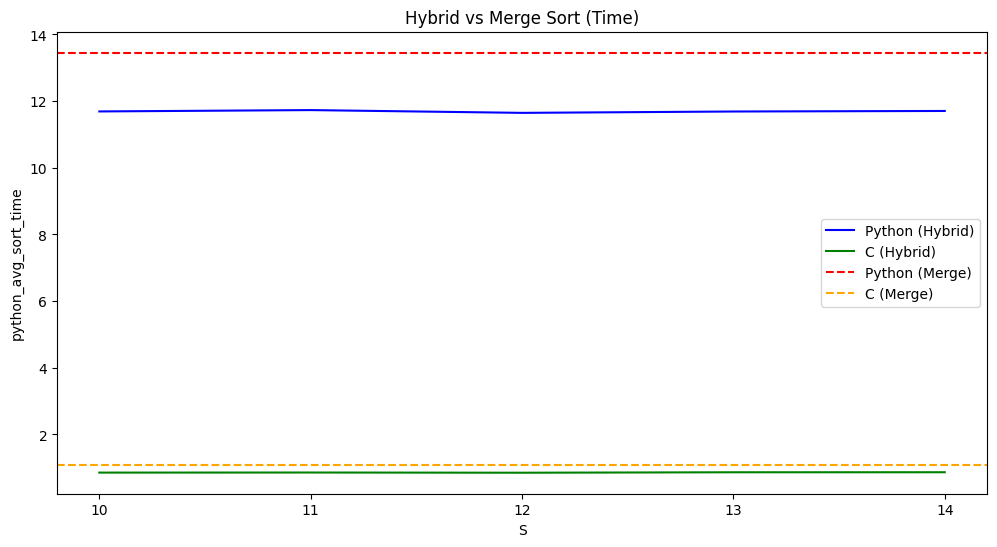

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(x="S", y="python_avg_sort_time", data=hsa, label="Python (Hybrid)",
             color="blue", markers=True, dashes=False, legend=True)

sns.lineplot(x="S", y="c_avg_sort_time", data=hsa, label="C (Hybrid)",
             color="green", markers=True, dashes=False, legend=True)

plt.axhline(y=msa["python_avg_sort_time"].iloc[0], label="Python (Merge)", 
            color="r", linestyle='--')

plt.axhline(y=msa["c_avg_sort_time"].iloc[0], label="C (Merge)", 
            color="orange", linestyle='--')

plt.xticks(hsa["S"].unique())

plt.title("Hybrid vs Merge Sort (Time)")
plt.legend()
plt.show()

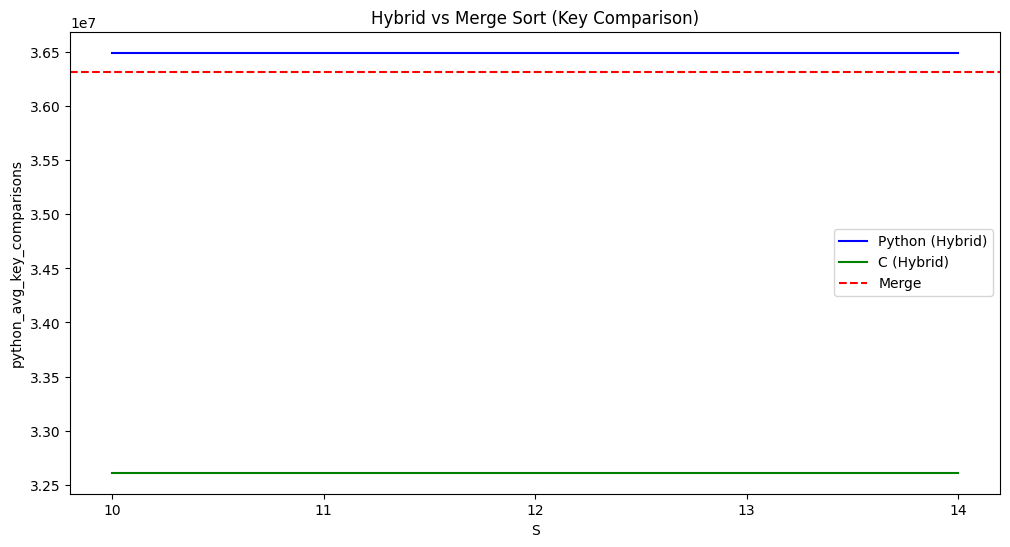

In [15]:
plt.figure(figsize=(12, 6))

sns.lineplot(x="S", y="python_avg_key_comparisons", data=hsa, label="Python (Hybrid)",
             color="blue", markers=True, dashes=False, legend=True)

sns.lineplot(x="S", y="c_avg_key_comparisons", data=hsa, label="C (Hybrid)",
             color="green", markers=True, dashes=False, legend=True)

plt.axhline(y=msa["python_avg_key_comparisons"].iloc[0], label="Merge", 
            color="r", linestyle='--')

plt.xticks(hsa["S"].unique())

plt.title("Hybrid vs Merge Sort (Key Comparison)")
plt.legend()
plt.show()

In [18]:
print("For S = 12, we get the following results:\n")
S = 12

# Python; S = 12, Avg. Sort Time
s_12_python_st = get_avg_sort_time(S, "python")
print(f"    Avg. Sort Time (Python): {s_12_python_st} seconds")

s_12_st_diff = abs(s_12_python_st - msa_python_st)

if s_12_python_st < msa_python_st:
    print(f"    -> Hybrid sort is {s_12_st_diff} seconds faster than merge sort (Python)\n")
else:
    print(f"    -> Merge sort is {s_12_st_diff} seconds faster than hybrid sort (Python)\n")

# Python; S = 12, Avg. Key Comparisons
s_12_python_kc = get_avg_key_comparison(S, "python")
print(f"    Avg. Key Comparisons (Python): {s_12_python_kc}")

s_12_kc_diff = abs(s_12_python_kc - msa_python_kc)

if s_12_python_kc < msa_python_kc:
    print(f"    -> Hybrid sort has {s_12_kc_diff} less key comparisons than merge sort (Python)\n")
else:
    print(f"    -> Merge sort has {s_12_kc_diff} less key comparisons than hybrid sort (Python)\n")

# C; S = 12, Avg. Sort Time
s_12_c_st = get_avg_sort_time(S, "c")
print(f"    Avg. Sort Time (C): {s_12_c_st} seconds")

s_12_st_diff = abs(s_12_c_st - msa_c_st)

if s_12_c_st < msa_c_st:
    print(f"    -> Hybrid sort is {s_12_st_diff} seconds faster than merge sort (C)\n")
else:
    print(f"    -> Merge sort is {s_12_st_diff} seconds faster than hybrid sort (C)\n")

# C; S = 12, Avg. Key Comparisons
s_12_c_kc = get_avg_key_comparison(S, "c")
print(f"    Avg. Key Comparisons (C): {s_12_c_kc}")

s_12_kc_diff = abs(s_12_c_kc - msa_c_kc)

if s_12_c_kc < msa_c_kc:
    print(f"    -> Hybrid sort has {s_12_kc_diff} less key comparisons than merge sort (C)\n")
else:
    print(f"    -> Merge sort has {s_12_kc_diff} less key comparisons than hybrid sort (C)\n")

For S = 12, we get the following results:

    Avg. Sort Time (Python): 11.646 seconds
    -> Hybrid sort is 1.8039999999999985 seconds faster than merge sort (Python)

    Avg. Key Comparisons (Python): 36495015.333
    -> Merge sort has 182540.16599999368 less key comparisons than hybrid sort (Python)

    Avg. Sort Time (C): 0.852 seconds
    -> Hybrid sort is 0.2300000000000001 seconds faster than merge sort (C)

    Avg. Key Comparisons (C): 32610447.833
    -> Hybrid sort has 3702027.3340000026 less key comparisons than merge sort (C)

